Generated synthetic data with 20 features, 5 true support features
True support features: [0, 1, 8, 15, 17]

Running run_lasso
Running run_lassonet


Choosing lambda with cross-validation: 100%|██████████| 5/5 [00:29<00:00,  5.93s/it]


Running run_random_forest
Running run_neural_net


GPU available: True (mps), used: False
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs


[NeuralNet] seed=0, hidden=128, dropout=0.3
Running run_nimo_baseline


/opt/anaconda3/envs/thesis_env/lib/python3.10/site-packages/lightning/pytorch/trainer/setup.py:177: GPU available but not used. You can set it by doing `Trainer(accelerator='gpu')`.


Sanity Checking: |          | 0/? [00:00<?, ?it/s]

/opt/anaconda3/envs/thesis_env/lib/python3.10/site-packages/lightning/pytorch/trainer/connectors/data_connector.py:425: The 'val_dataloader' does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` to `num_workers=11` in the `DataLoader` to improve performance.
/opt/anaconda3/envs/thesis_env/lib/python3.10/site-packages/lightning/pytorch/trainer/connectors/data_connector.py:425: The 'train_dataloader' does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` to `num_workers=11` in the `DataLoader` to improve performance.


Training: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

`Trainer.fit` stopped: `max_epochs=50` reached.
/opt/anaconda3/envs/thesis_env/lib/python3.10/site-packages/lightning/pytorch/trainer/connectors/data_connector.py:425: The 'predict_dataloader' does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` to `num_workers=11` in the `DataLoader` to improve performance.


Predicting: |          | 0/? [00:00<?, ?it/s]

Predict loss: 0.6696851253509521
Predict ACC: 0.609375
Predict loss: 0.6594215035438538
Predict ACC: 0.71875
Predict loss: 0.6524859070777893
Predict ACC: 0.671875
Predict loss: 0.6677553653717041
Predict ACC: 0.375
Running run_nimo_variant
                    f1_test  precision_s  recall_s  n_selected
model                                                         
run_lasso          0.916201     0.384615       1.0          13
run_lassonet       0.908046     0.625000       1.0           8
run_random_forest  1.000000     0.000000       0.0          20
run_neural_net     0.883721     0.000000       0.0          20
run_nimo_baseline  0.615917     0.187500       0.6          16
run_nimo_variant   0.915254     0.294118       1.0          17


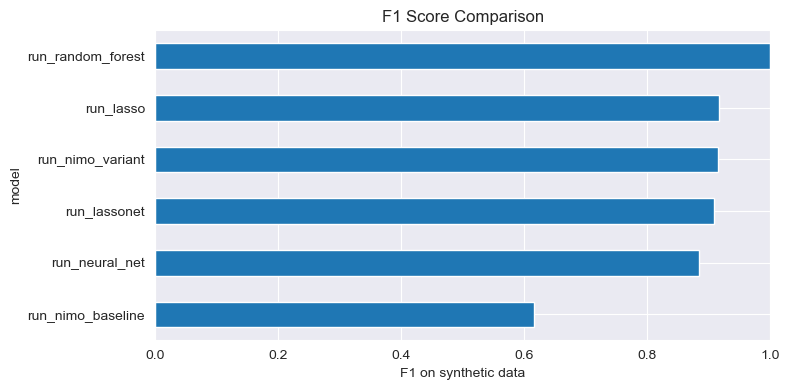

Feature Selection Confusion Matrices:


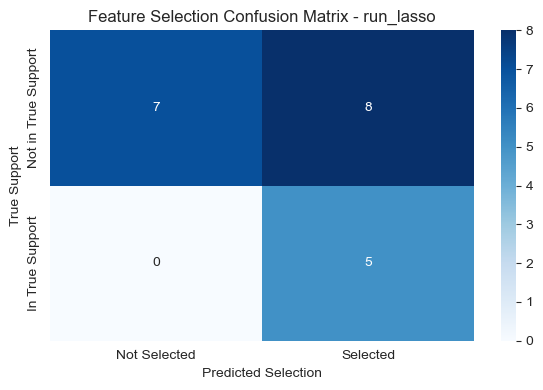

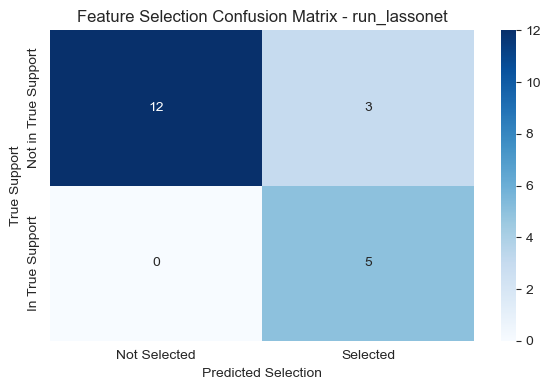

run_random_forest does not perform feature selection, skipping.
run_neural_net does not perform feature selection, skipping.


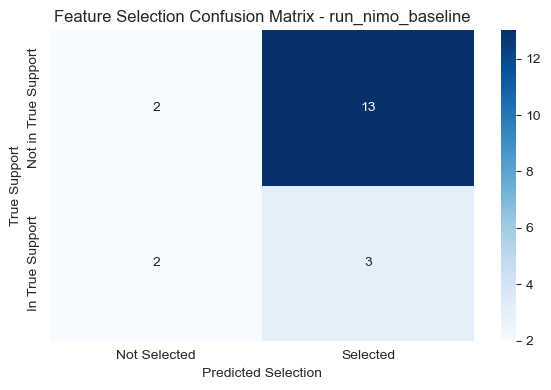

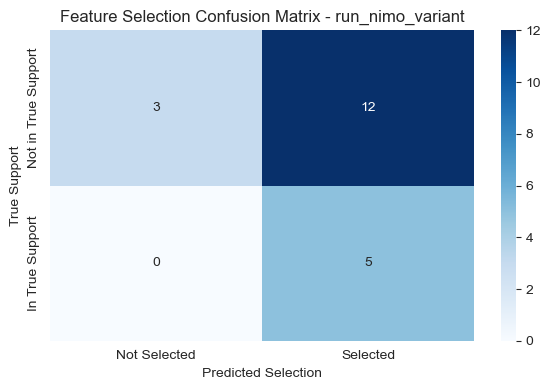

Feature Selection Summary:
True support features: [0, 1, 8, 15, 17]

run_lasso:
  Selected features: [0, 1, 2, 4, 8, 9, 11, 13, 15, 16, 17, 18, 19]
  Number selected: 13

run_lassonet:
  Selected features: [0, 1, 2, 8, 15, 16, 17, 18]
  Number selected: 8

run_random_forest:
  Selected features: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19]
  Number selected: 20

run_neural_net:
  Selected features: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19]
  Number selected: 20

run_nimo_baseline:
  Selected features: [0, 1, 2, 3, 4, 5, 6, 7, 9, 10, 12, 13, 15, 16, 18, 19]
  Number selected: 16

run_nimo_variant:
  Selected features: [0, 1, 2, 3, 4, 6, 7, 8, 9, 10, 12, 13, 15, 16, 17, 18, 19]
  Number selected: 17

Analysis complete!


In [3]:
# Cell 1 – Imports und Setup
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

from sklearn.metrics import f1_score, precision_score, recall_score

from methods.lasso          import run_lasso
from methods.lasso_Net     import run_lassonet
from methods.random_forest  import run_random_forest
from methods.neural_net     import run_neural_net
from methods.nimo_variants.baseline import run_nimo_baseline
from methods.nimo_variants.variant import run_nimo_variant

# Cell 2 – Synthetische Daten erzeugen
import numpy as np
from scipy.special import expit

np.random.seed(42)
n, d, k = 200, 20, 5
beta_true = np.zeros(d)
support   = np.random.choice(d, size=k, replace=False)
beta_true[support] = np.random.uniform(1.0, 3.0, size=k)
X = np.random.randn(n, d)
p = expit(X.dot(beta_true))
y = np.random.binomial(1, p)

print(f"Generated synthetic data with {d} features, {k} true support features")
print(f"True support features: {sorted(support)}")
print()

# ============================================================================
# CELL 3: Add visualization functions
# ============================================================================
def plot_support_confusion(out, support, d, method_name):
    """
    Plot feature-level confusion matrix for support recovery.
    """
    selected_features = out.get('selected_features', [])

    # Convert feature names to indices if needed
    if selected_features and isinstance(selected_features[0], str):
        selected_indices = [int(f.split('_')[-1]) if '_' in f else int(f) for f in selected_features]
    else:
        selected_indices = selected_features

    # Create binary vectors
    true_support_vec = np.zeros(d)
    true_support_vec[support] = 1

    predicted_support_vec = np.zeros(d)
    predicted_support_vec[selected_indices] = 1

    # Calculate confusion matrix
    tp = np.sum((true_support_vec == 1) & (predicted_support_vec == 1))
    tn = np.sum((true_support_vec == 0) & (predicted_support_vec == 0))
    fp = np.sum((true_support_vec == 0) & (predicted_support_vec == 1))
    fn = np.sum((true_support_vec == 1) & (predicted_support_vec == 0))

    # Create confusion matrix
    conf_matrix = np.array([[tn, fp], [fn, tp]])

    # Plot heatmap
    plt.figure(figsize=(6, 4))
    sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues',
                xticklabels=['Not Selected', 'Selected'],
                yticklabels=['Not in True Support', 'In True Support'])
    plt.title(f'Feature Selection Confusion Matrix - {method_name}')
    plt.ylabel('True Support')
    plt.xlabel('Predicted Selection')
    plt.tight_layout()
    plt.show()

def print_feature_selection_summary(methods, all_results_dicts, support):
    """
    Print detailed feature selection summary.
    """
    print("Feature Selection Summary:")
    print("=" * 60)
    print(f"True support features: {sorted(support)}")
    print()
    for method, result in zip(methods, all_results_dicts):
        selected = result['selected_features']
        print(f"{method.__name__}:")
        print(f"  Selected features: {sorted(selected)}")
        print(f"  Number selected: {len(selected)}")
        print()

# ============================================================================
# CELL 4: Modify your eval_method function to store full results
# ============================================================================
def eval_method(fn, X_tr, y_tr, X_te, y_te, **kwargs):
    out = fn(
        X_tr, y_tr, X_te, y_te,
        rng=None,
        iteration=0,
        randomState=0,
        X_columns=list(range(d)),
        **kwargs
    )
    # F1 auf Test
    f1 = out.get('best_f1', np.nan)
    # Sparsity
    n_sel = out.get('n_selected', 0)
    # Support-Recovery Precision/Recall (nur wenn Methode Selektion hat)
    if out.get('method_has_selection', False):
        recov = set(out['selected_features'])
        true_supp = set(support)
        prec = precision_score(
            [1 if i in true_supp else 0 for i in range(d)],
            [1 if i in recov   else 0 for i in range(d)],
            zero_division=0
        )
        rec = recall_score(
            [1 if i in true_supp else 0 for i in range(d)],
            [1 if i in recov   else 0 for i in range(d)],
            zero_division=0
        )
    else:
        prec = rec = 0.0

    return {
        'model':       fn.__name__,
        'f1_test':     f1,
        'precision_s': prec,
        'recall_s':    rec,
        'n_selected':  n_sel,
        'out':         out  # Store full output for confusion matrix
    }

# ============================================================================
# CELL 5: Method evaluation loop with updated methods list
# ============================================================================
methods = [
    run_lasso,
    run_lassonet,
    run_random_forest,
    run_neural_net,
    run_nimo_baseline,
    run_nimo_variant
]

results = []
all_results_dicts = []  # Store full results for visualizations
for m in methods:
    print("Running", m.__name__)
    res = eval_method(m, X, y, X, y)
    results.append(res)
    all_results_dicts.append(res['out'])

df_res = pd.DataFrame([{k: v for k, v in r.items() if k != 'out'} for r in results]).set_index('model')
print(df_res)

# ============================================================================
# CELL 6: F1 accuracy plot (first plot as requested)
# ============================================================================
plt.figure(figsize=(8, 4))
df_res['f1_test'].sort_values().plot(kind='barh')
plt.xlabel("F1 on synthetic data")
plt.xlim(0, 1)
plt.title("F1 Score Comparison")
plt.tight_layout()
plt.show()

# ============================================================================
# CELL 7: Feature-level confusion matrices (second plot as requested)
# ============================================================================
print("Feature Selection Confusion Matrices:")
print("=" * 60)
for method, result in zip(methods, all_results_dicts):
    if result.get('method_has_selection', True):
        plot_support_confusion(result, support, d, method.__name__)
    else:
        print(f"{method.__name__} does not perform feature selection, skipping.")

# ============================================================================
# CELL 8: Feature selection summary (third plot as requested)
# ============================================================================
print_feature_selection_summary(methods, all_results_dicts, support)

print("Analysis complete!")